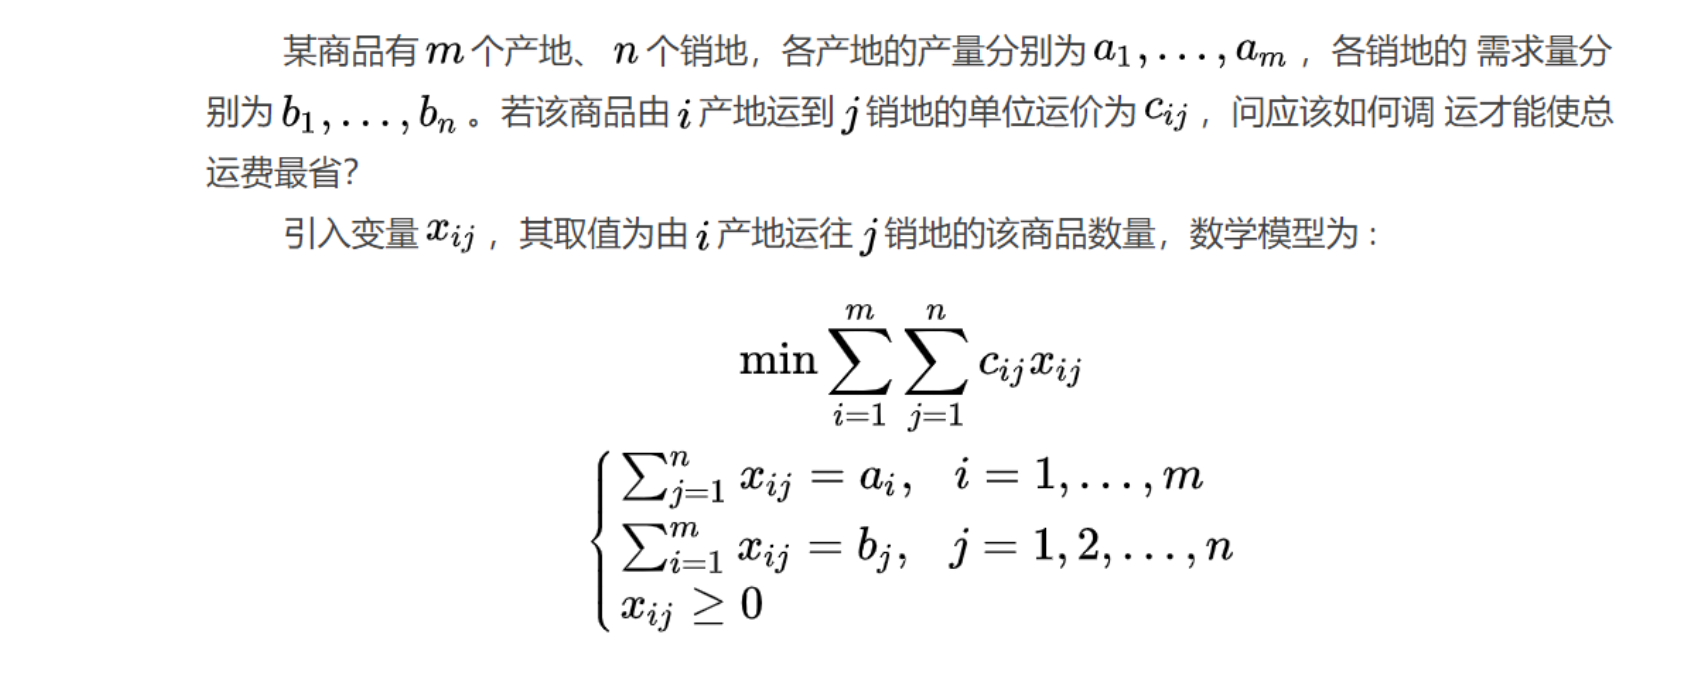

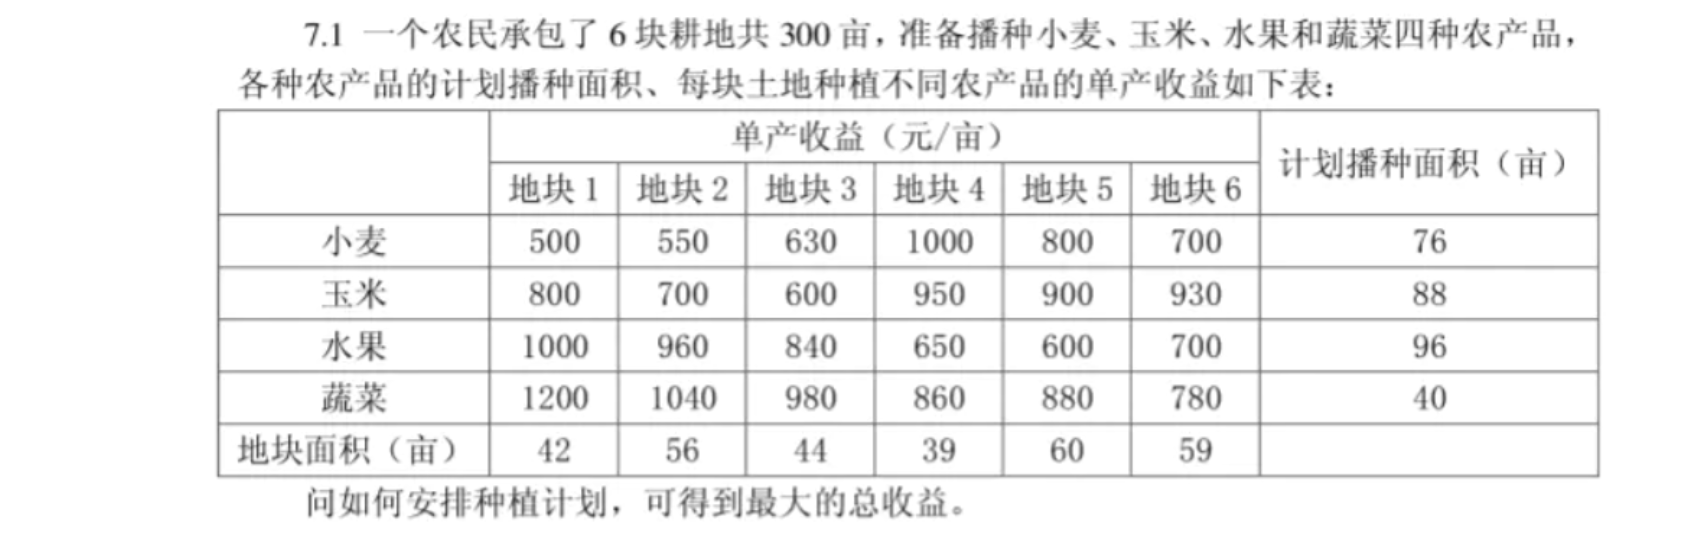

In [1]:
import pulp
import numpy as np
from pprint import pprint

In [4]:
def transportation_problem(costs, x_max, y_max):

    row = len(costs)
    col = len(costs[0])

    prob = pulp.LpProblem('Transportation_Problem', sense=pulp.LpMaximize)

    var = [[pulp.LpVariable(f'x{i}{j}', lowBound=0, cat=pulp.LpInteger)
            for j in range(col)] for i in range(row)]

    def flatten(x): return [y for l in x for y in flatten(
        l)] if type(x) is list else [x]

    prob += pulp.lpDot(flatten(var), costs.flatten())

    for i in range(row):
        prob += (pulp.lpSum(var[i]) <= x_max[i])

    for j in range(col):
        prob += (pulp.lpSum([var[i][j] for i in range(row)]) <= y_max[j])

    prob.solve()

    return {'objective': pulp.value(prob.objective), 'var': [[pulp.value(var[i][j]) for j in range(col)] for i in range(row)]}

In [5]:
if __name__ == '__main__':
    costs = np.array([[500, 550, 630, 1000, 800, 700],
                      [800, 700, 600, 950, 900, 930],
                      [1000, 960, 840, 650, 600, 700],
                      [1200, 1040, 980, 860, 880, 780]])

    max_plant = [76, 88, 96, 40]
    max_cultivation = [42, 56, 44, 39, 60, 59]
    res = transportation_problem(costs, max_plant, max_cultivation)

    print(f'最大值为{res["objective"]}')
    print('各变量的取值为：')
    pprint(res['var'])

# output:
# 最大值为284230.0
# 各变量的取值为：
# [[0.0, 0.0, 6.0, 39.0, 31.0, 0.0],
# [0.0, 0.0, 0.0, 0.0, 29.0, 59.0],
# [2.0, 56.0, 38.0, 0.0, 0.0, 0.0],
# [40.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

最大值为284230.0
各变量的取值为：
[[0.0, 0.0, 6.0, 39.0, 31.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 29.0, 59.0],
 [2.0, 56.0, 38.0, 0.0, 0.0, 0.0],
 [40.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
